<a href="https://colab.research.google.com/github/LuciaPuppo897/Data_UY/blob/version_sin_corregir/Trabajo_final_museos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis comparativo de exposiciones realizadas en los museos Azulejo, Subte y MuHar de Montevideo durante 2023 y 2024**


---


## **Objetivo del Proyecto**

El objetivo principal de este proyecto es analizar la distribución y las características de las exposiciones culturales realizadas en tres importantes museos de Montevideo: el Museo del Azulejo, el Centro de Exposiciones Subte, y el Museo de Historia del Arte (MuHar), durante los años 2023 y 2024.
Este análisis pretende identificar patrones de programación y diversidad cultural dentro de la oferta museística de Montevideo, y, a partir de ello, generar una predicción para el año 2025. Específicamente, se busca examinar el impacto de diversas variables sobre las exposiciones culturales y el público al que están dirigidas.

+ **Origen de los Datos :**
Los datos empleados para este análisis provienen del portal de Datos Abiertos de la Intendencia de Montevideo. En particular, se utilizaron los conjuntos de datos disponibles en el siguiente enlace: https://ckan.montevideo.gub.uy/dataset/museos .
Para garantizar la representatividad y la calidad del análisis, se ha considerado un período de dos años como referencia, dado que los datos disponibles no superan los 50 registros por museo en promedio. Cabe destacar que algunas variables no están completamente reflejadas en todos los museos, lo que ha limitado el alcance de ciertas áreas del análisis.

## **Variables Consideradas en el Estudio**
Para este análisis, se ha seleccionado un conjunto específico de variables que son relevantes para entender la dinámica de las exposiciones culturales en Montevideo. Las variables clave que se han considerado son:

+ Iniciativa del Museo: Esta variable nos permite diferenciar entre las exposiciones que son iniciativa del museo y aquellas que forman parte de colaboraciones externas. Es relevante ya que la iniciativa del museo puede influir en el tipo de público que atrae la exposición y en el formato de la actividad (charlas, exposiciones, etc.).

+ Público Destinatario: Una de las variables más importantes, ya que clasifica las exposiciones según su público objetivo: Todo público, Infancia, Adolescentes etc. Esta categorización es clave para analizar qué tipo de actividades están dirigidas a cada grupo, permitiendo identificar posibles tendencias de acceso y participación de diferentes públicos en los museos.

+ Tipo de Actividad: Este es otro factor fundamental que clasifica las exposiciones según su naturaleza. Las categorías consideradas incluyen Exposición, Conversatorio, Taller, Espectáculos, Intervención visual, entre otros. Analizar este tipo de actividades en relación con el público destinatario es esencial para identificar si hay una mayor participación de ciertos grupos en actividades específicas.

+ Sobre otras variables que se dejaron de lado que podrían mejorar el trabajo de predicción y ayudar a un mayor analisís fueron:
 - Fecha y duración de la actividad: debido a que no en todos los data set se encontraba presente la fecha o mes de incio y final, y era dificil de restrear con el tiempo que se tiene para el trabajo.
 - Género de los artistas: debido a que no estaba presente en todos los data set.

## **Metodología de Análisis**
El análisis se ha estructurado utilizando técnicas estadísticas y de visualización para identificar patrones y relaciones en los datos. Se han realizado los siguientes pasos:

- Limpieza y Preprocesamiento de Datos: Los datos fueron limpiados y estandarizados utilizando la librería Pandas en Python. Las columnas con errores de codificación, como caracteres extraños, fueron corregidas. Además, se estandarizaron las categorías de las variables, como Tipo de Actividad y Público Destinatario, para asegurar que los datos sean coherentes y se puedan analizar de manera efectiva.

- Análisis Descriptivo: Se generaron tablas de contingencia y gráficos de barras para explorar la relación entre el Tipo de Actividad y el Público Destinatario, así como el Tipo de Actividad y la Iniciativa del Museo. Estos análisis proporcionan una visión clara de la distribución de las actividades en función del público y el rol de las iniciativas del museo.

- Análisis Predictivo: Con los datos ya estandarizados, se propone la implementación de modelos de predicción, como el k-Nearest Neighbors (kNN), para predecir la oferta de actividades para el año 2025. Este modelo podrá utilizar las relaciones encontradas en los años 2023 y 2024 para proyectar las actividades más frecuentes y los públicos más propensos a asistir a dichas actividades.



---




A continuación se subiran los dataset a ser utilizados:
* subte_2023.csv
* subte_2024.csv
* muhar_2023.csv
* muhar_2024.csv
* museo-del-azulejo_2023.csv
* museo-del-azulejo_2024.csv


In [67]:
from google.colab import files
import os
# Subir archivos
uploaded = files.upload()

os.listdir('/content/')



Saving muhar_2023.csv to muhar_2023.csv
Saving subte_2023.csv to subte_2023.csv
Saving museo-del-azulejo_2024.csv to museo-del-azulejo_2024.csv
Saving museo-del-azulejo_2023.csv to museo-del-azulejo_2023.csv
Saving muhar_2024.csv to muhar_2024.csv
Saving subte_2024.csv to subte_2024.csv


['.config',
 'museo-del-azulejo_2024.csv',
 'subte_2024.csv',
 'muhar_2024.csv',
 'museo-del-azulejo_2023.csv',
 'subte_2023.csv',
 '.ipynb_checkpoints',
 'muhar_2023.csv',
 'sample_data']

In [92]:
#Importamos las librerias a usar:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chi-cuadrado
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
import statsmodels.api as sm

# kNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# **Limpieza de Datos:**

---



Antes de realizar cualquier análisis, fue necesario llevar a cabo una limpieza y estandarización de los datos debido a las inconsistencias encontradas en los diferentes conjuntos de datos.
**Limitaciones:** Es importante señalar que los conjuntos de datos utilizados presentan diferencias en sus formatos y valores. Algunos archivos incluyen tanto el mes de inicio como el mes de finalización de las actividades, mientras que otros solo contienen la fecha, o no contienen una de las dos claves (inicio o fin) Debido a esta discrepancia, se decidió no tomar en cuenta la duración de las actividades, ya que los valores inconsistentes dificultan el cálculo preciso de este parámetro.

Transformaciones aplicadas:
* Conversión de Meses: En un inicio se intento calcular la duración de las actividades, como se describio previamente esto fue descartado.

* Correción de caracteres: se aplico una trasnformación a la nomeclatura de los datos para que sean más legibles y comprensibles a la hora de ser analizados y presendatos

* Estandarización de Categorías: Para otras columnas con valores categóricos, como público_destinatario y Actividades, también se realizó un proceso de estandarización. Esto implicó unificar las distintas formas en que se escribían los valores (por ejemplo, "todo público", "adolescentes", etc.), para asegurar que las categorías fueran consistentes a través de todos los datasets.

* Manejo de Valores Nulos y Erróneos: Se eliminaron o imputaron los valores nulos en las columnas clave, como Año, Museo y Actividades, para asegurar que los análisis posteriores fueran precisos y no estuvieran sesgados por la falta de datos.Por ejemplo ciertos dataset no contaban con la columna “museo” pero gracias a que se sabe a qué museo pertenecían se agrego para poder hacer la comparación más fácil. Con la columna *Actividades* se tuvo que tomar en cuenta que en algunos dataset se le denominaba *Actividad*


## **Estandarización de la columna actividad/actividades:**

---




* En primer lugar se cambio el nombre de la columna *actividad* en el dataset  **Muhar_2024** y *actividades* en el dataset **Muhar_2023** que corresponda con la nomeclatura de los demás datasets, para posteriormente seguir con la estandarización de la columna Actividades
 -  Esto incluye eliminar espacios extra en los nombres de las columnas, renombrar la columna a 'Actividades', corregir errores de codificación y estandarizar las categorías de las actividades.
 - Se decidio hacerlo de forma manual debido a que eran dataset con limitada cantidad de datos y para tener un mejor control




In [140]:
# Función para renombrar la columna 'Actividad' a 'Actividades' y estandarizar las categorías
def estandarizar_actividades(df):
    df.columns = df.columns.str.strip()

    if 'Actividad' in df.columns:
        df.rename(columns={'Actividad': 'Actividades'}, inplace=True)
    elif 'actividades' in df.columns:
        df.rename(columns={'actividades': 'Actividades'}, inplace=True)

    df['Actividades'] = df['Actividades'].str.strip().str.lower()

    # Reemplazar los nombres de las categorías mal codificadas
    df['Actividades'] = df['Actividades'].str.replace('exposici¢n', 'exposición')
    df['Actividades'] = df['Actividades'].str.replace('exposiciã³n', 'exposición')
    df['Actividades'] = df['Actividades'].str.replace('Exposiciã³n', 'exposición')
    df['Actividades'] = df['Actividades'].str.replace('act. didã¡cticas', 'act. didacticas')
    df['Actividades'] = df['Actividades'].str.replace('act. did cticas', 'act. didacticas')
    df['Actividades'] = df['Actividades'].str.replace('espectã¡culos', 'Espectáculos')
    df['Actividades'] = df['Actividades'].str.replace('convocatoria pãºblica', 'convocatoria pública')
    df['Actividades'] = df['Actividades'].str.replace('taller y/o  seminario', 'taller y/o seminario')
    df['Actividades'] = df['Actividades'].str.replace('intervensiã³n visual', 'ntervención visual')
    df['Actividades'] = df['Actividades'].str.replace('visita guiada', 'visita guiada')
    df['Actividades'] = df['Actividades'].str.replace('convocatoria p£blica', 'convocatoria pública')
    df['Actividades'] = df['Actividades'].str.replace('act. did\xa0cticas', 'act. didácticas')
    df['Actividades'] = df['Actividades'].str.replace('danza \xa0rabe', 'danza árabe')
    df['Actividades'] = df['Actividades'].str.replace('Vvsita/recorrido guiado', 'visita/Recorrido guiado')



    # Estandarizar las categorías de la columna 'Actividades'
    df['Actividades'] = df['Actividades'].str.strip().str.lower().replace({
        'exposición': 'exposición',
        'charla': 'charla',
        'taller': 'taller',
        'conversatorio': 'conversatorio',
        'act. didacticas': 'act. didacticas',
        'ciclo de conferencias': 'charla'
    }).str.capitalize()  # Convertir a mayúsculas la primera letra de cada palabra

    return df

# Cargar los archivos CSV
subte_2023 = pd.read_csv('/content/subte_2023.csv', encoding='latin-1')
subte_2024 = pd.read_csv('/content/subte_2024.csv', encoding='latin-1')
muhar_2023 = pd.read_csv('/content/muhar_2023.csv', encoding='latin-1')
muhar_2024 = pd.read_csv('/content/muhar_2024.csv', encoding='latin-1')
azulejo_2023 = pd.read_csv('/content/museo-del-azulejo_2023.csv', encoding='latin-1')
azulejo_2024 = pd.read_csv('/content/museo-del-azulejo_2024.csv', encoding='latin-1')

# Aplicar la estandarización a los DataFrames
subte_2023 = estandarizar_actividades(subte_2023)
subte_2024 = estandarizar_actividades(subte_2024)
muhar_2024 = estandarizar_actividades(muhar_2024)
muhar_2023 = estandarizar_actividades(muhar_2023)
azulejo_2023 = estandarizar_actividades(azulejo_2023)
azulejo_2024 = estandarizar_actividades(azulejo_2024)



## Estandarización la columna **publico destinatario**

In [142]:
# Función para corregir los caracteres mal codificados y estandarizar la columna 'público_destinatario'
def estandarizar_publico_destinatario(df):

    df.columns = df.columns.str.strip()

    # Renombrar las columnas si tiene problemas de codificación
    if 'pÃºblico_destinatario' in df.columns:
        df.rename(columns={'pÃºblico_destinatario': 'público_destinatario'}, inplace=True)
    elif 'p£blico_destinatario' in df.columns:
        df.rename(columns={'p£blico_destinatario': 'público_destinatario'}, inplace=True)

    # Verificar que la columna 'público_destinatario' esté correctamente nombrada
    if 'público_destinatario' in df.columns:
        # Convertir la columna 'público_destinatario' a minúsculas
        df['público_destinatario'] = df['público_destinatario'].str.strip().str.lower()

        # Reemplazar los nombres de las categorías mal codificadas
        df['público_destinatario'] = df['público_destinatario'].str.replace('todo pãºblico', 'todo público')
        df['público_destinatario'] = df['público_destinatario'].str.replace('todo p£blico', 'todo público')
        df['público_destinatario'] = df['público_destinatario'].str.replace('situaciã³n de discapacidad', 'situación de discapacidad')



        # Estandarizar las categorías de la columna 'público_destinatario'
        df['público_destinatario'] = df['público_destinatario'].str.strip().str.lower().replace({
          'todo público': 'todo público',
          'infancia': 'infancia',
          'adolescencia': 'adolescencia',
          'adultos': 'adultos',
          'situación de discapacidad': 'situación de discapacidad'
        }).str.capitalize()

        return df

# Aplicar la estandarización a los DataFrames
subte_2023 = estandarizar_publico_destinatario(subte_2023)
subte_2024 = estandarizar_publico_destinatario(subte_2024)
muhar_2023 = estandarizar_publico_destinatario(muhar_2023)
muhar_2024 = estandarizar_publico_destinatario(muhar_2024)
azulejo_2023 = estandarizar_publico_destinatario(azulejo_2023)
azulejo_2024 = estandarizar_publico_destinatario(azulejo_2024)




## Estandarización la columna **iniciativa museo**



In [144]:
def estandarizar_iniciativa_museo(df):
    # Renombrar la columna 'iniciativa_museo' si tiene problemas de codificación
    df.columns = df.columns.str.strip()  # Eliminar espacios extra en los nombres de las columnas
    if 'iniciativa_museo' not in df.columns:
        df.rename(columns={df.columns[df.columns.str.contains('iniciativa', case=False)].tolist()[0]: 'iniciativa_museo'}, inplace=True)
    return df
subte_2023 = estandarizar_iniciativa_museo(subte_2023)
subte_2024 = estandarizar_iniciativa_museo(subte_2024)
muhar_2023 = estandarizar_iniciativa_museo(muhar_2023)
muhar_2024 = estandarizar_iniciativa_museo(muhar_2024)
azulejo_2023 = estandarizar_iniciativa_museo(azulejo_2023)
azulejo_2024 = estandarizar_iniciativa_museo(azulejo_2024)



# **Analisís descriptivo**

---



### **Actividades - Publico destinatario**

1. **Creación de tablas de contingencia**:  
   Utilizamos `pd.crosstab()`, una función de pandas que nos permite generar una tabla de contingencia entre dos variables categóricas. En este caso, las variables son **Actividades** y **Público Destinatario**.

2. **Generación de las gráficas**:  
   Usamos **Seaborn** y **Matplotlib** para crear **gráficos de calor (heatmaps)**, para mostrar visualmente las frecuencias de las combinaciones entre las dos variables. Esto nos permite a identificar rápidamente patrones y tendencias en los datos, como qué actividades tienen más público y cómo varía esto a lo largo de los años.

3. **Prueba de Chi-cuadrado**:  
   Para analizar si existe una relación estadísticamente significativa entre **Actividades** y **Público Destinatario**, usamos la función `chi2_contingency` de **Scipy**. Esta prueba estadística nos da un **chi-cuadrado** y un **p-valor**. Si el **p-valor** es menor a 0.05, rechazamos la hipótesis nula, lo que sugiere que existe una relación significativa entre las actividades y el público al que están dirigidas, de lo contrario se puede decir que son variables independientes.


In [150]:
# Verificar si hay valores nulos en 'Actividades' y 'público_destinatario' para asegurarnos de poder hacer un analisís correcto.
print(subte_2023[['Actividades', 'público_destinatario']].isnull().sum())


Actividades             0
público_destinatario    0
dtype: int64


In [151]:
# Crear la tabla de contingencia para Subte 2023
contingency_subte_2023 = pd.crosstab(subte_2023['Actividades'], subte_2023['público_destinatario'])

# Crear la tabla de contingencia para Subte 2024
contingency_subte_2024 = pd.crosstab(subte_2024['Actividades'], subte_2024['público_destinatario'])

# Crear la tabla de contingencia para MuHar 2023
contingency_muhar_2023 = pd.crosstab(muhar_2023['Actividades'], muhar_2023['público_destinatario'])

# Crear la tabla de contingencia para MuHar 2024
contingency_muhar_2024 = pd.crosstab(muhar_2024['Actividades'], muhar_2024['público_destinatario'])

# Crear la tabla de contingencia para Azulejo 2023
contingency_azulejo_2023 = pd.crosstab(azulejo_2023['Actividades'], azulejo_2023['público_destinatario'])

# Crear la tabla de contingencia para Azulejo 2024
contingency_azulejo_2024 = pd.crosstab(azulejo_2024['Actividades'], azulejo_2024['público_destinatario'])


### A continuación se mostraran graficamente con **graficos de calor**,lo cual muestra la frecuencia con la que ocurren las combinaciones de estas dos variables (Actividades y Público destinatario) en los datos de cada museo.

**MuHar 2023 y 2024**

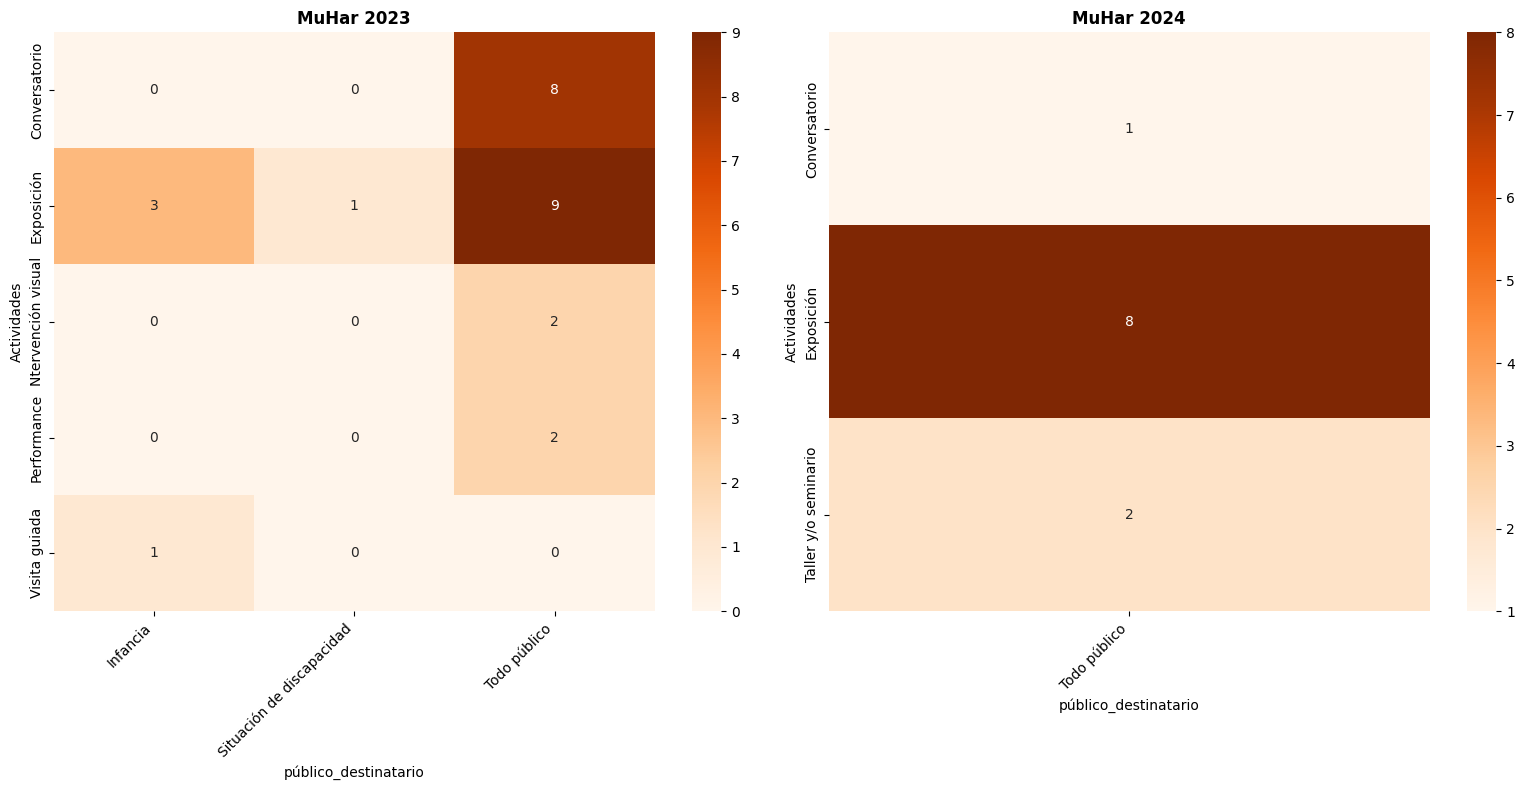

In [152]:

# Crear la figura para MuHar con más espacio
fig, ax = plt.subplots(1, 2, figsize=(16, 8))  # Ajuste del tamaño

# Para MuHar 2023
sns.heatmap(pd.crosstab(muhar_2023['Actividades'], muhar_2023['público_destinatario']), annot=True, cmap="Oranges", fmt="d", ax=ax[0])
ax[0].set_title("MuHar 2023", fontweight='bold')  # Título en negrita
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha="right")  # Mejorar las etiquetas del eje X

# Para MuHar 2024
sns.heatmap(pd.crosstab(muhar_2024['Actividades'], muhar_2024['público_destinatario']), annot=True, cmap="Oranges", fmt="d", ax=ax[1])
ax[1].set_title("MuHar 2024", fontweight='bold')  # Título en negrita
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha="right")  # Mejorar las etiquetas del eje X

plt.tight_layout()

# Mostrar las gráficas
plt.show()



**Subte 2023 y Subte 2024**

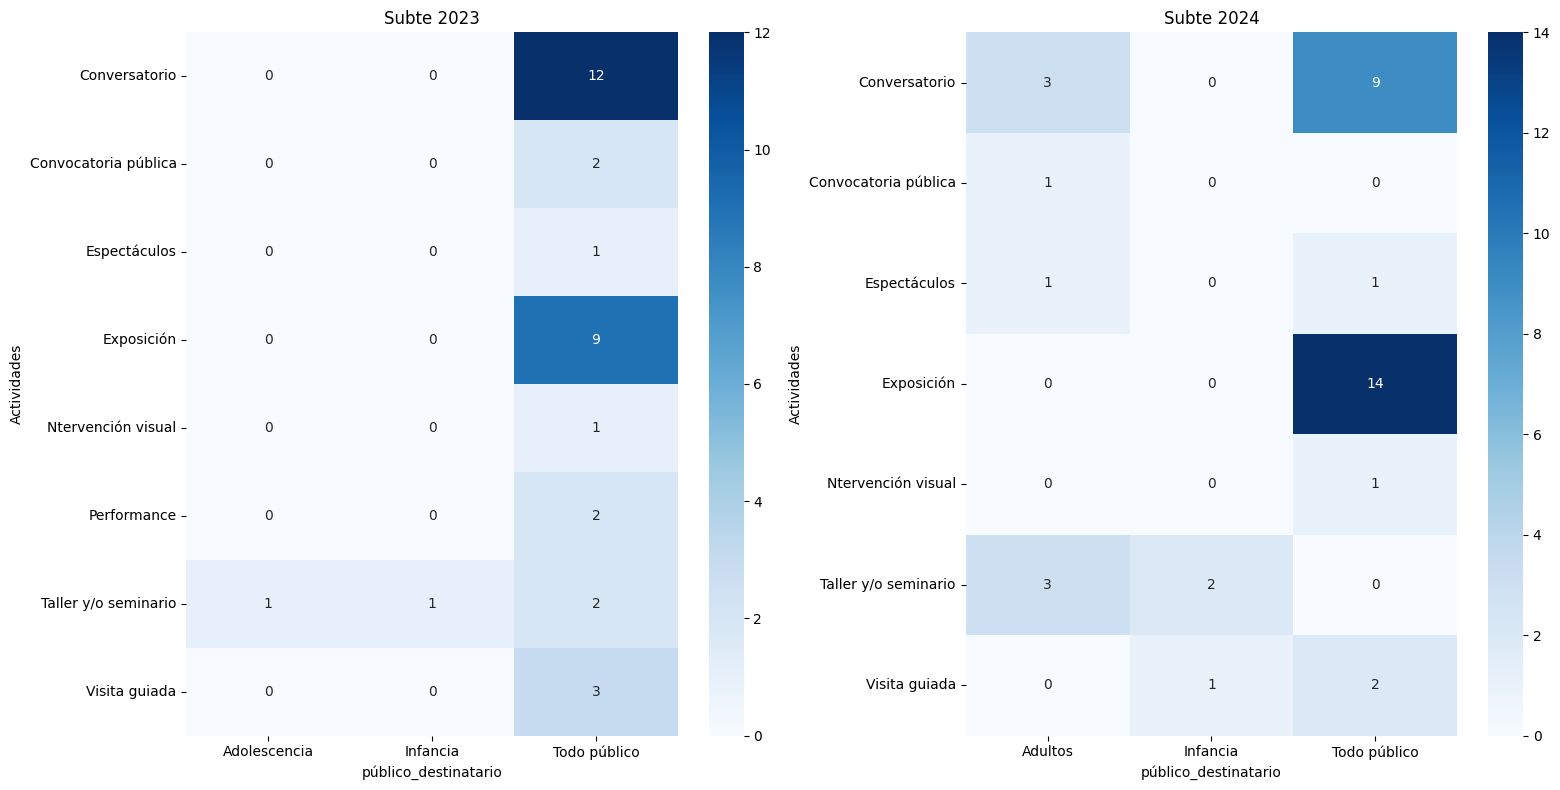

In [153]:
# Crear la figura para Subte
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Para Subte 2023
sns.heatmap(pd.crosstab(subte_2023['Actividades'], subte_2023['público_destinatario']), annot=True, cmap="Blues", fmt="d", ax=ax[0])
ax[0].set_title("Subte 2023")

# Para Subte 2024
sns.heatmap(pd.crosstab(subte_2024['Actividades'], subte_2024['público_destinatario']), annot=True, cmap="Blues", fmt="d", ax=ax[1])
ax[1].set_title("Subte 2024")

# Ajustar el espacio entre los gráficos
plt.tight_layout()

# Mostrar las gráficas
plt.show()



**Museo del azulejo 2023 y 2024**

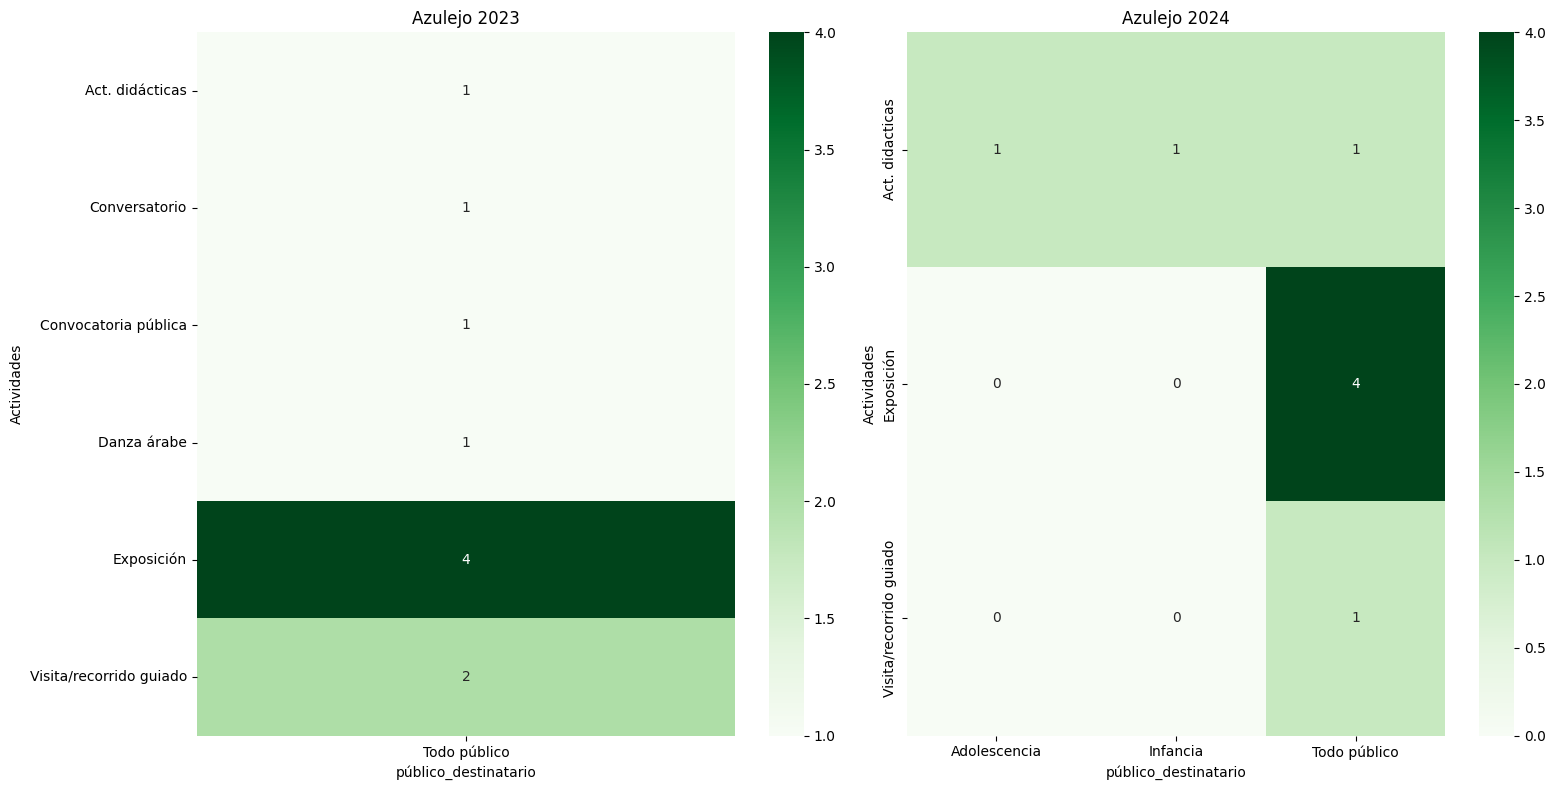

In [154]:
# Crear la figura para Azulejo
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Para Azulejo 2023
sns.heatmap(pd.crosstab(azulejo_2023['Actividades'], azulejo_2023['público_destinatario']), annot=True, cmap="Greens", fmt="d", ax=ax[0])
ax[0].set_title("Azulejo 2023")

# Para Azulejo 2024
sns.heatmap(pd.crosstab(azulejo_2024['Actividades'], azulejo_2024['público_destinatario']), annot=True, cmap="Greens", fmt="d", ax=ax[1])
ax[1].set_title("Azulejo 2024")

# Ajustar el espacio entre los gráficos
plt.tight_layout()

# Mostrar las gráficas
plt.show()


Prueba de **Chi-cuadrado** para poder analizar si existe una relación directa entre las variables actividad y publico destinatario. Se realizaran por museo y por año y se mostrara el resultado

In [155]:

# Función para aplicar Chi-cuadrado y mostrar los resultados con formato
def chi2_analysis_with_formatting(contingency_table, museum_name):
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    bold_museum_name = f"\033[1m{museum_name}\033[0m"

    print(f"\nChi-cuadrado para {bold_museum_name}:")
    print(f"Chi-cuadrado: {chi2:.2f}")
    print(f"Grados de libertad: {dof}")
    print(f"P-valor: {p:.4f}")


    if p < 0.05:
        result_color = '\033[92m' #verde
        significance = "Existe una relación significativa"
    else:
        result_color = '\033[91m' #rojo
        significance = "No existe una relación significativa"

    print(f"{result_color}{significance} entre las actividades y el público destinatario en {museum_name}. \033[0m")


# Aplicar el análisis de Chi-cuadrado a cada museo con formato mejorado
chi2_analysis_with_formatting(contingency_subte_2023, 'Subte 2023')
chi2_analysis_with_formatting(contingency_subte_2024, 'Subte 2024')
chi2_analysis_with_formatting(contingency_muhar_2023, 'MuHar 2023')
chi2_analysis_with_formatting(contingency_muhar_2024, 'MuHar 2024')
chi2_analysis_with_formatting(contingency_azulejo_2023, 'Azulejo 2023')
chi2_analysis_with_formatting(contingency_azulejo_2024, 'Azulejo 2024')




Chi-cuadrado para Subte 2023:
Chi-cuadrado: 15.94
Grados de libertad: 14
P-valor: 0.3172
No existe una relación significativa entre las actividades y el público destinatario en Subte 2023. 

Chi-cuadrado para Subte 2024:
Chi-cuadrado: 28.78
Grados de libertad: 12
P-valor: 0.0042
Existe una relación significativa entre las actividades y el público destinatario en Subte 2024. 

Chi-cuadrado para MuHar 2023:
Chi-cuadrado: 9.57
Grados de libertad: 8
P-valor: 0.2964
No existe una relación significativa entre las actividades y el público destinatario en MuHar 2023. 

Chi-cuadrado para MuHar 2024:
Chi-cuadrado: 0.00
Grados de libertad: 0
P-valor: 1.0000
No existe una relación significativa entre las actividades y el público destinatario en MuHar 2024. 

Chi-cuadrado para Azulejo 2023:
Chi-cuadrado: 0.00
Grados de libertad: 0
P-valor: 1.0000
No existe una relación significativa entre las actividades y el público destinatario en Azulejo 2023. 

Chi-cuadrado para Azulejo 2024:
Chi-cuadrado: 4.4

## **Actividad vs Iniciativa del museo**

- Creación de tablas de contingencia: Utilizaremos pd.crosstab() para generar tablas de contingencia entre Actividades y Iniciativa del museo.

- Gráficas: Dado que la variable Iniciativa del museo es booleana, en lugar de un heatmap, utilizaremos gráficos de barras para visualizar cuántas actividades están asociadas a la iniciativa del museo en comparación con las que no lo están.

- Prueba de Chi-cuadrado: Al igual que con el análisis de Actividad - Público Destinatario, utilizaremos la función chi2_contingency de scipy para verificar si existe una relación significativa entre las actividades y la iniciativa del museo





**Graficas de Barras:** Actividades vs Iniciativa del museo
- Por museo y año



In [156]:
# Crear las tablas de contingencia por museo y año
contingency_iniciative_subte_2023 = pd.crosstab(subte_2023['Actividades'], subte_2023['iniciativa_museo'])
contingency_iniciative_subte_2024 = pd.crosstab(subte_2024['Actividades'], subte_2024['iniciativa_museo'])
contingency_iniciative_muhar_2023 = pd.crosstab(muhar_2023['Actividades'], muhar_2023['iniciativa_museo'])
contingency_iniciative_muhar_2024 = pd.crosstab(muhar_2024['Actividades'], muhar_2024['iniciativa_museo'])
contingency_iniciative_azulejo_2023 = pd.crosstab(azulejo_2023['Actividades'], azulejo_2023['iniciativa_museo'])
contingency_iniciative_azulejo_2024 = pd.crosstab(azulejo_2024['Actividades'], azulejo_2024['iniciativa_museo'])

## **MuHar 2023 - 2024**

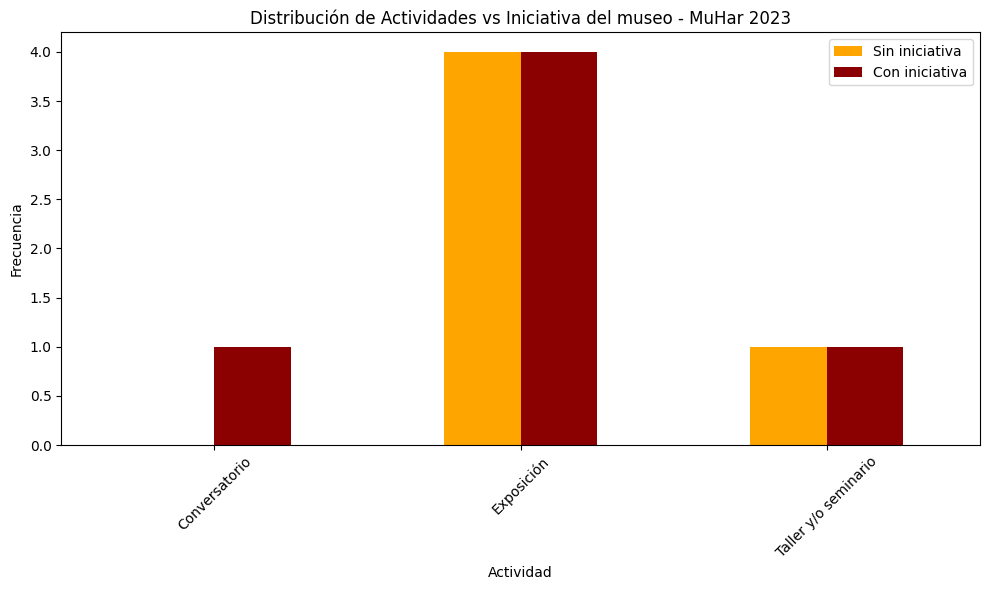

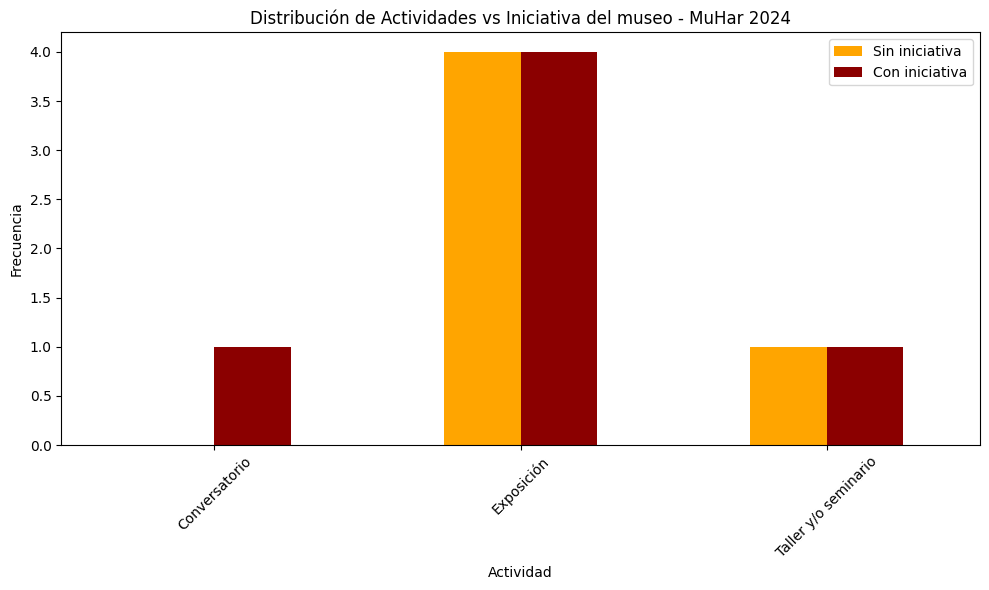

In [157]:

# Función para contar la frecuencia de 'Sí' y 'No' por actividad
def contar_si_no(df, museo_nombre, año):
    # Contar la cantidad de "Sí" y "No" en la columna 'iniciativa_museo' por actividad
    count_table = pd.crosstab(df['Actividades'], df['iniciativa_museo'])

    # Renombrar las columnas para mayor claridad
    count_table.columns = ['Sin iniciativa', 'Con iniciativa']

    #Grafica de comparación "Si" vs "No" para cada actividad
    ax = count_table.plot(kind='bar', stacked=False, figsize=(10, 6), color=['orange', 'darkred'])
    plt.title(f"Distribución de Actividades vs Iniciativa del museo - {museo_nombre} {año}")
    plt.xlabel("Actividad")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



contar_si_no(muhar_2024, 'MuHar', 2023)
contar_si_no(muhar_2024, 'MuHar', 2024)




## **Subte 2023 - 2024**

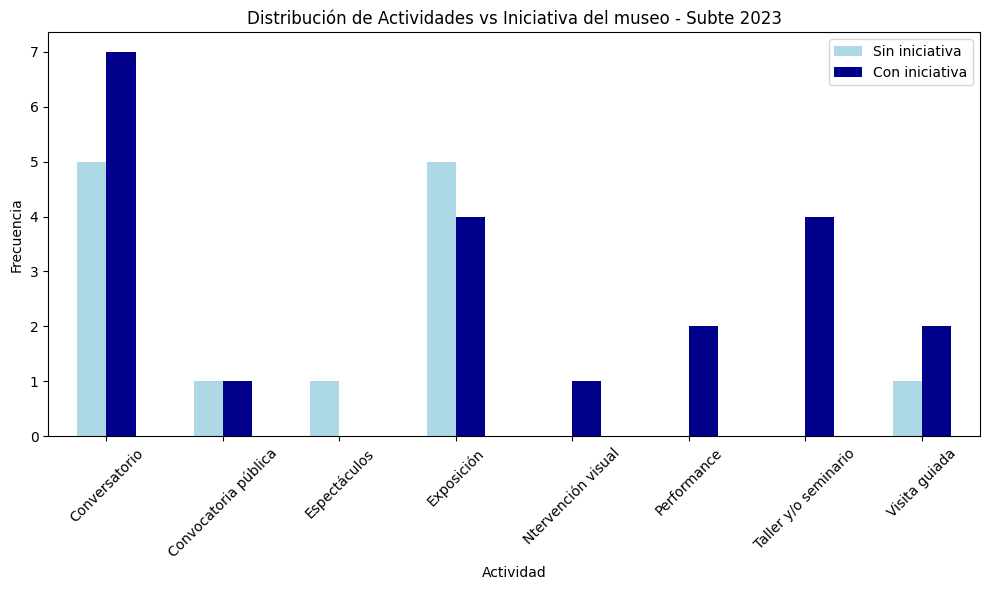

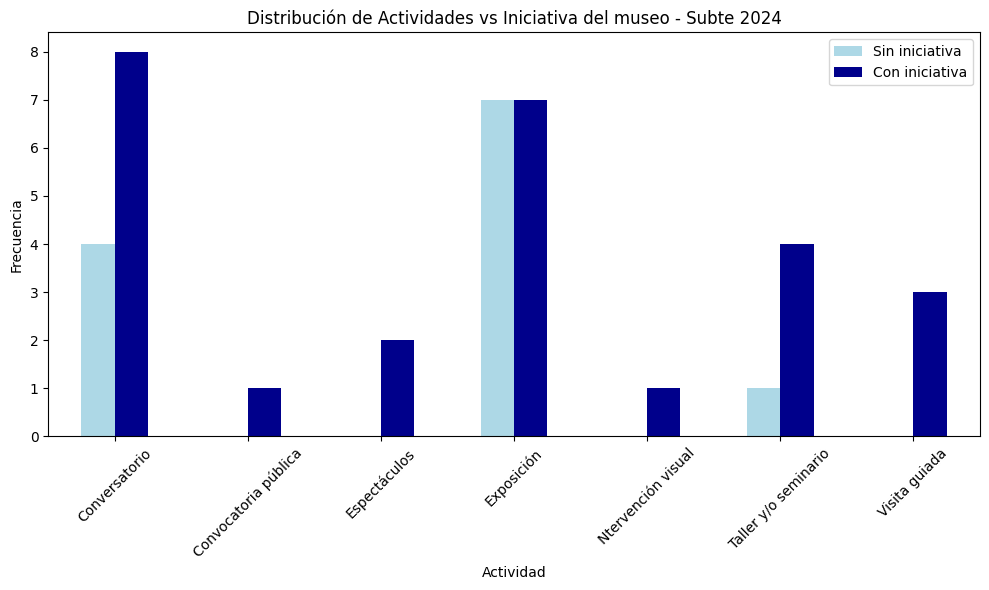

In [158]:

# Función para contar la frecuencia de 'Sí' y 'No' por actividad
def contar_si_no(df, museo_nombre, año):
    # Contar la cantidad de "Sí" y "No" en la columna 'iniciativa_museo' por actividad
    count_table = pd.crosstab(df['Actividades'], df['iniciativa_museo'])

    # Renombrar las columnas para mayor claridad
    count_table.columns = ['Sin iniciativa', 'Con iniciativa']

    #Grafica de comparación "Si" vs "No" para cada actividad
    ax = count_table.plot(kind='bar', stacked=False, figsize=(10, 6), color=['lightblue', 'darkblue'])
    plt.title(f"Distribución de Actividades vs Iniciativa del museo - {museo_nombre} {año}")
    plt.xlabel("Actividad")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2, top=0.95)  # Ajustar el espacio
    plt.tight_layout()
    plt.show()

# Imprimir Grafico
contar_si_no(subte_2023, 'Subte', 2023)
contar_si_no(subte_2024, 'Subte', 2024)




## **Museo del Azulejo 2023 y 2024**

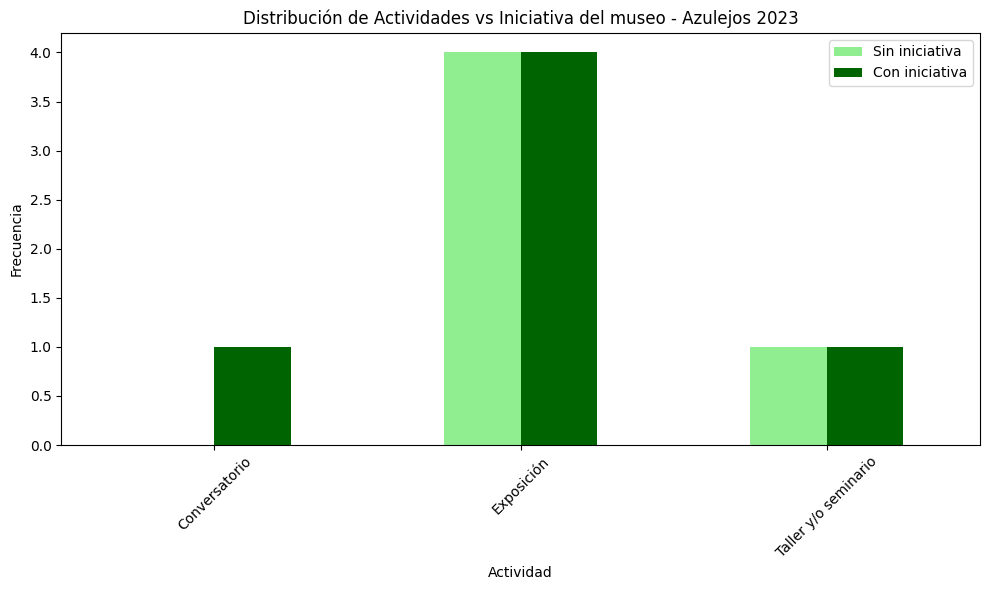

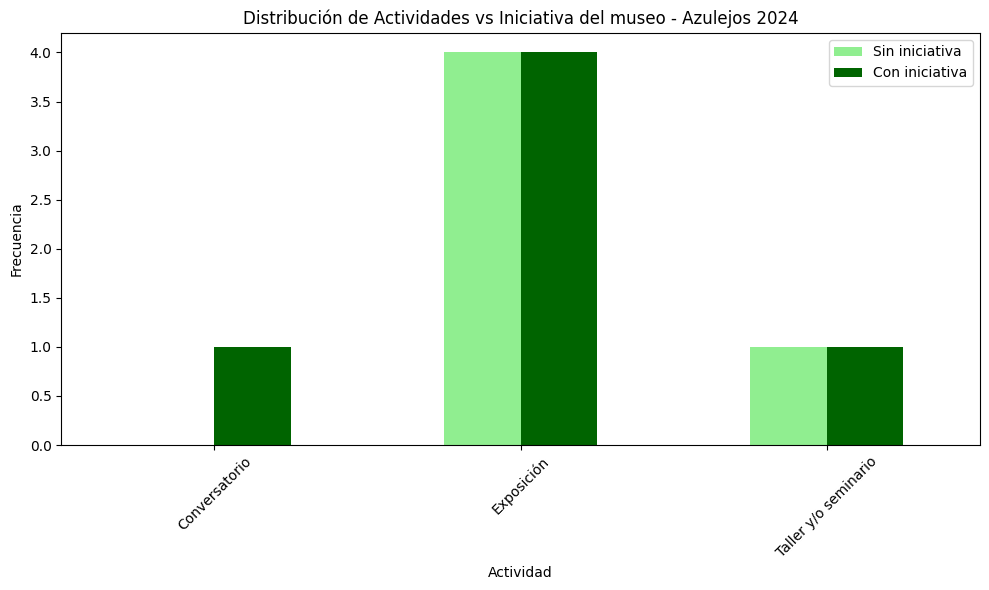

In [159]:
# Función para contar la frecuencia de 'Sí' y 'No' por actividad
def contar_si_no(df, museo_nombre, año):
    # Contar la cantidad de "Sí" y "No" en la columna 'iniciativa_museo' por actividad
    count_table = pd.crosstab(df['Actividades'], df['iniciativa_museo'])

    # Renombrar las columnas para mayor claridad
    count_table.columns = ['Sin iniciativa', 'Con iniciativa']

    #Grafica de comparación "Si" vs "No" para cada actividad
    ax = count_table.plot(kind='bar', stacked=False, figsize=(10, 6), color=['lightgreen', 'darkgreen'])
    plt.title(f"Distribución de Actividades vs Iniciativa del museo - {museo_nombre} {año}")
    plt.xlabel("Actividad")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Imprimir Grafico
contar_si_no(muhar_2024, 'Azulejos', 2023)
contar_si_no(muhar_2024, 'Azulejos', 2024)


### A continuación se aplicara la prueba de **Chi-cuadrado** y se muestran resultados





In [160]:
# Función para aplicar la prueba de Chi-cuadrado
def chi2_analysis_iniciativa(contingency_table, museum_name):
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    # Resaltar nombre museo
    bold_museum_name = f"\033[1m{museum_name}\033[0m"

    print(f"\nChi-cuadrado para {bold_museum_name}:")
    print(f"Chi-cuadrado: {chi2}")
    print(f"Grados de libertad: {dof}")
    print(f"P-valor: {p}")

    if p < 0.05:
        result_color = '\033[92m'  # verde
        significance = "Existe una relación significativa"
    else:
        result_color = '\033[91m'  # rojo
        significance = "No existe una relación significativa"

    print(f"{result_color}{significance} entre las actividades y el público destinatario en {bold_museum_name}. \033[0m")


# Chi-cuadrado análisis
chi2_analysis_iniciativa(contingency_iniciative_subte_2023, 'Subte 2023')
chi2_analysis_iniciativa(contingency_iniciative_subte_2024, 'Subte 2024')
chi2_analysis_iniciativa(contingency_iniciative_muhar_2023, 'MuHar 2023')
chi2_analysis_iniciativa(contingency_iniciative_muhar_2024, 'MuHar 2024')
chi2_analysis_iniciativa(contingency_iniciative_azulejo_2023, 'Azulejo 2023')
chi2_analysis_iniciativa(contingency_iniciative_azulejo_2024, 'Azulejo 2024')




Chi-cuadrado para Subte 2023:
Chi-cuadrado: 7.299552299552299
Grados de libertad: 7
P-valor: 0.3983710188747665
No existe una relación significativa entre las actividades y el público destinatario en Subte 2023. 

Chi-cuadrado para Subte 2024:
Chi-cuadrado: 5.756837606837606
Grados de libertad: 6
P-valor: 0.4509731629897451
No existe una relación significativa entre las actividades y el público destinatario en Subte 2024. 

Chi-cuadrado para MuHar 2023:
Chi-cuadrado: 1.04
Grados de libertad: 4
P-valor: 0.9036712329146954
No existe una relación significativa entre las actividades y el público destinatario en MuHar 2023. 

Chi-cuadrado para MuHar 2024:
Chi-cuadrado: 0.9166666666666669
Grados de libertad: 2
P-valor: 0.6323366621862497
No existe una relación significativa entre las actividades y el público destinatario en MuHar 2024. 

Chi-cuadrado para Azulejo 2023:
Chi-cuadrado: 0.0
Grados de libertad: 0
P-valor: 1.0
No existe una relación significativa entre las actividades y el públic

# **Análisis predictivo:**
Con los datos ya estandarizados, se  pretenderá la implementación de modelos de predicción, como el k-Nearest Neighbors (kNN), para predecir la oferta de actividades para el año 2025. Este modelo podrá utilizar las relaciones encontradas en los años 2023 y 2024 para proyectar las actividades más frecuentes y los públicos más propensos a asistir a dichas actividades.


---

